# 02 - Análisis Exploratorio de Datos (EDA)
## Proyecto Final: Análisis de Datos
### Objetivo: Explorar y visualizar los datos para identificar patrones y relaciones

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración de visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Librerías importadas correctamente")

Librerías importadas correctamente


In [29]:
# Cargar datos curados
data_path = "../data/"
clients = pd.read_csv(os.path.join(data_path, "clients_curated.csv"))
projects = pd.read_csv(os.path.join(data_path, "projects_curated.csv"))

# Convertir fechas
date_cols = ['start_date', 'planned_end_date', 'actual_end_date']
for col in date_cols:
    projects[col] = pd.to_datetime(projects[col])

print("Datos cargados y procesados correctamente")

Datos cargados y procesados correctamente


In [30]:
# Unir datasets para análisis completo
df_merged = projects.merge(clients, on='client_id', how='left')
print(f"Dataset merged: {df_merged.shape}")
df_merged.head(3)

Dataset merged: (200, 20)


,project_id,client_id,start_date,planned_end_date,actual_end_date,budget_usd,dev_team_size,complexity,status,final_cost_usd,duration_planned,duration_actual,industry,size,region,support_contract,tickets_opened_last_year,avg_response_time_hours,satisfaction_score,renewed_contract
0,P2000,C1050,2024-01-15,2024-04-03,2024-03-27,27811.31,4,Media,On-time,27496.80,79,72,Otros,Grande,Oruro,1,25,12.8,1,1
1,P2001,C1057,2023-11-08,2024-04-16,2024-08-07,15455.14,5,Media,Delayed,17813.71,160,273,Retail,Mediana,Oruro,1,18,27.7,1,1
2,P2002,C1004,2024-10-01,2025-01-31,2025-01-25,26634.78,11,Baja,On-time,27121.70,122,116,Retail,Grande,Oruro,0,26,18.4,5,1


## Análisis de Proyectos

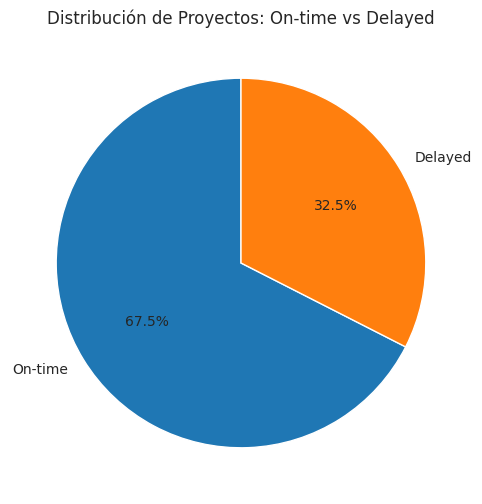

Resumen de estados:
status
On-time    135
Delayed     65
Name: count, dtype: int64


In [31]:
# 1. Distribución de status de proyectos
plt.figure(figsize=(8, 6))
status_counts = projects['status'].value_counts()
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Proyectos: On-time vs Delayed')
plt.show()

print("Resumen de estados:")
print(status_counts)

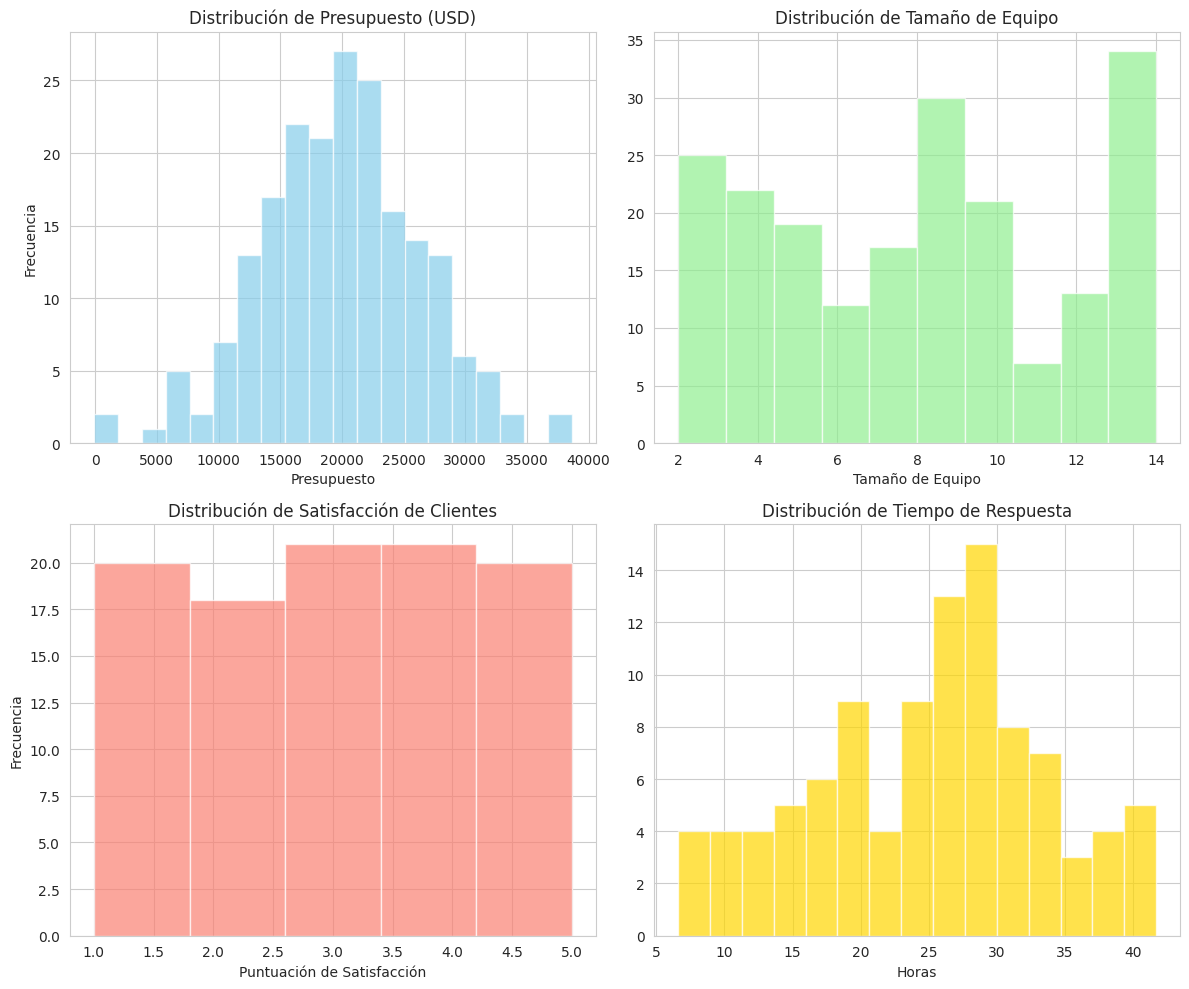

In [32]:
# 2. Histogramas de variables numéricas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Budget
axes[0,0].hist(projects['budget_usd'], bins=20, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribución de Presupuesto (USD)')
axes[0,0].set_xlabel('Presupuesto')
axes[0,0].set_ylabel('Frecuencia')

# Team size
axes[0,1].hist(projects['dev_team_size'], bins=10, alpha=0.7, color='lightgreen')
axes[0,1].set_title('Distribución de Tamaño de Equipo')
axes[0,1].set_xlabel('Tamaño de Equipo')

# Satisfaction score
axes[1,0].hist(clients['satisfaction_score'], bins=5, alpha=0.7, color='salmon')
axes[1,0].set_title('Distribución de Satisfacción de Clientes')
axes[1,0].set_xlabel('Puntuación de Satisfacción')
axes[1,0].set_ylabel('Frecuencia')

# Response time
axes[1,1].hist(clients['avg_response_time_hours'], bins=15, alpha=0.7, color='gold')
axes[1,1].set_title('Distribución de Tiempo de Respuesta')
axes[1,1].set_xlabel('Horas')

plt.tight_layout()
plt.show()

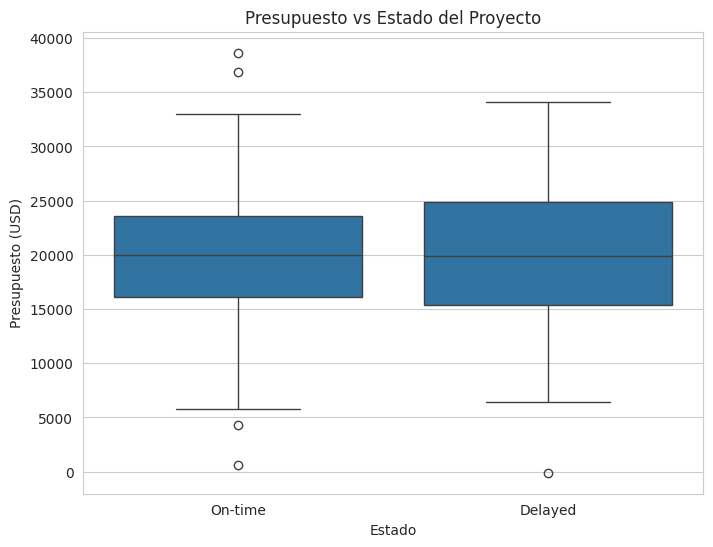

Estadísticas por estado:


,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Delayed,65.0,19745.063538,6786.406988,-98.98,15361.00,19901.86,24916.85,34070.07
On-time,135.0,19883.555704,6444.364191,585.06,16108.73,19962.22,23624.88,38642.28


In [33]:
# 3. Boxplot: Budget vs Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='status', y='budget_usd', data=projects)
plt.title('Presupuesto vs Estado del Proyecto')
plt.ylabel('Presupuesto (USD)')
plt.xlabel('Estado')
plt.show()

# Estadísticas descriptivas
print("Estadísticas por estado:")
projects.groupby('status')['budget_usd'].describe()

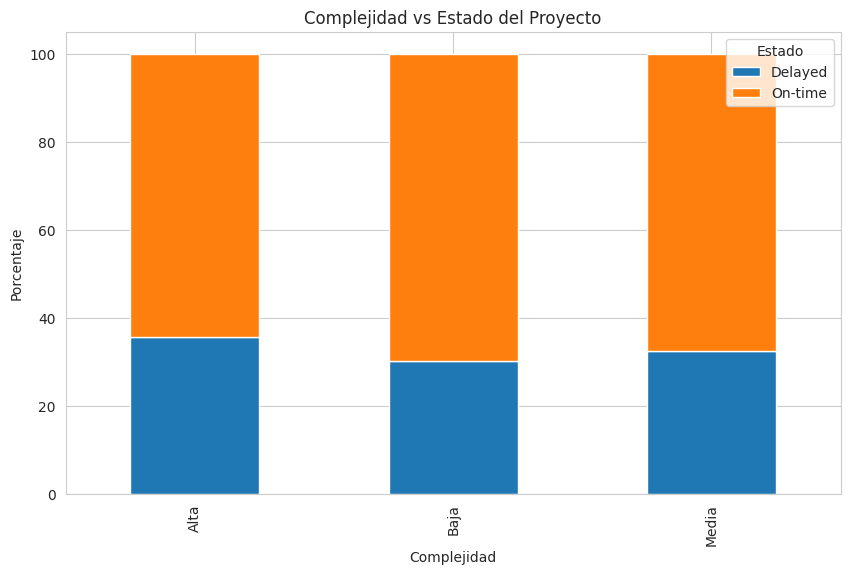

Tabla de contingencia:


status,Delayed,On-time
complexity,,
Alta,35.714286,64.285714
Baja,30.188679,69.811321
Media,32.380952,67.619048


In [34]:
# 4. Complejidad vs Estado
complexity_status = pd.crosstab(projects['complexity'], projects['status'], normalize='index') * 100
complexity_status.plot(kind='bar', stacked=True)
plt.title('Complejidad vs Estado del Proyecto')
plt.ylabel('Porcentaje')
plt.xlabel('Complejidad')
plt.legend(title='Estado')
plt.show()

print("Tabla de contingencia:")
complexity_status

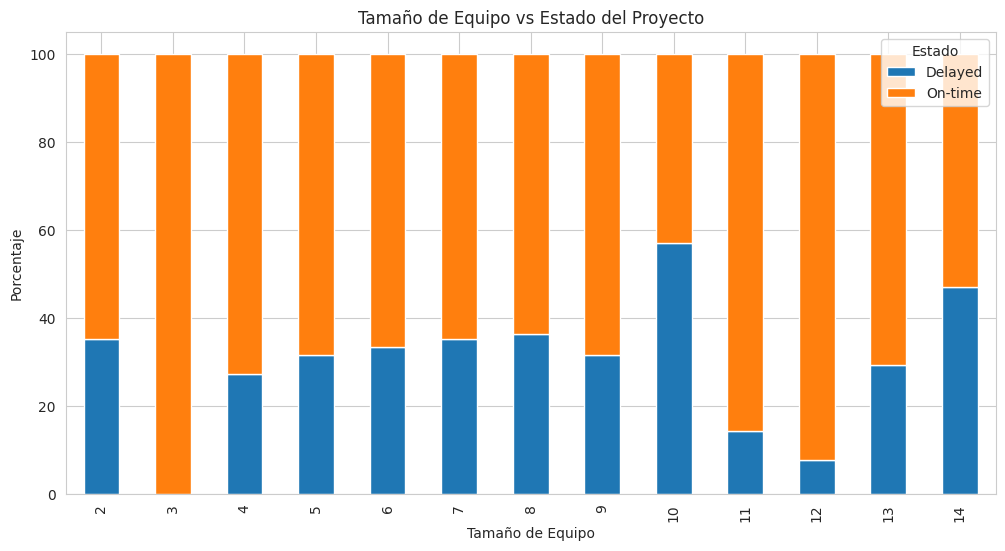

In [35]:
# 5. Tamaño de equipo vs Estado
team_status = pd.crosstab(projects['dev_team_size'], projects['status'], normalize='index') * 100
team_status.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Tamaño de Equipo vs Estado del Proyecto')
plt.ylabel('Porcentaje')
plt.xlabel('Tamaño de Equipo')
plt.legend(title='Estado')
plt.show()

## Análisis de Clientes

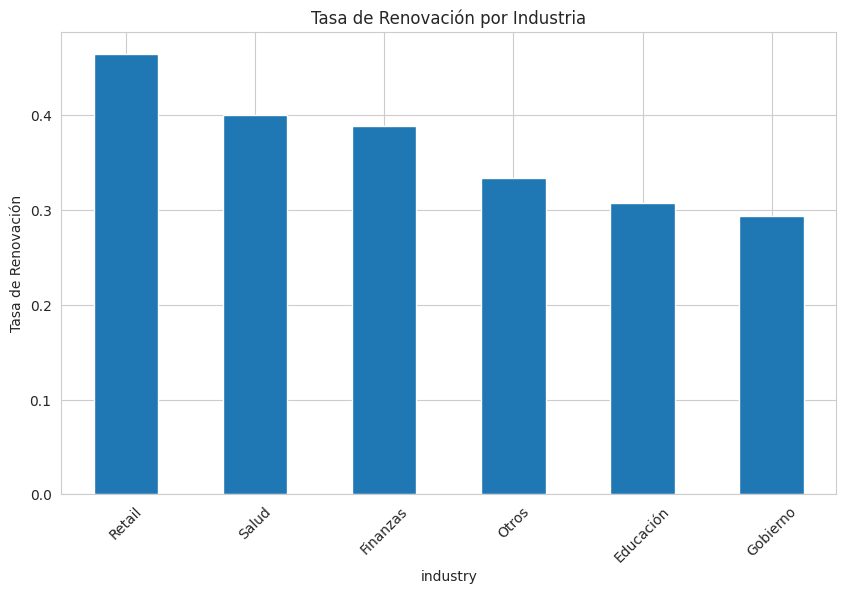

Tasa de renovación por industria:


industry
Retail       0.464286
Salud        0.400000
Finanzas     0.388889
Otros        0.333333
Educación    0.307692
Gobierno     0.294118
Name: renewed_contract, dtype: float64

In [36]:
# 1. Tasa de renovación por industria
renewal_by_industry = clients.groupby('industry')['renewed_contract'].mean().sort_values(ascending=False)
renewal_by_industry.plot(kind='bar')
plt.title('Tasa de Renovación por Industria')
plt.ylabel('Tasa de Renovación')
plt.xticks(rotation=45)
plt.show()

print("Tasa de renovación por industria:")
renewal_by_industry

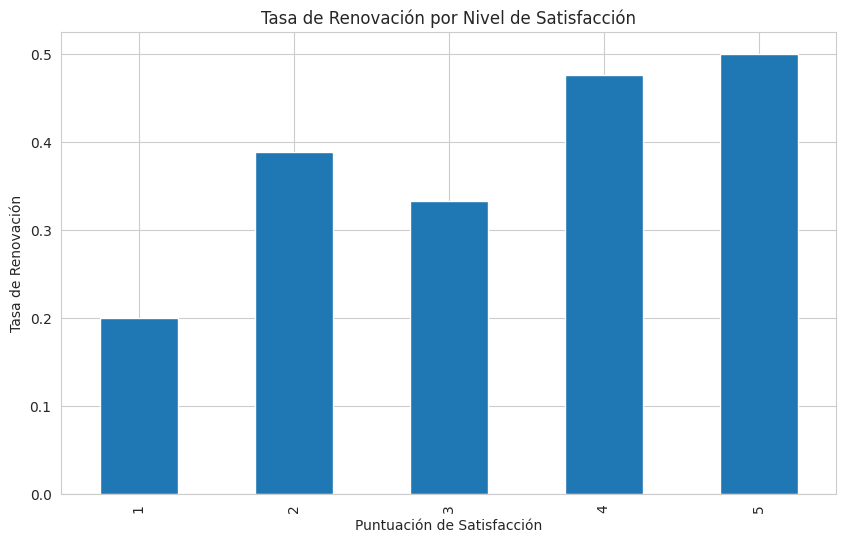

Tasa de renovación por satisfacción:


satisfaction_score
1    0.200000
2    0.388889
3    0.333333
4    0.476190
5    0.500000
Name: renewed_contract, dtype: float64

In [37]:
# 2. Satisfacción vs Renovación
renewal_by_satisfaction = clients.groupby('satisfaction_score')['renewed_contract'].mean()
renewal_by_satisfaction.plot(kind='bar')
plt.title('Tasa de Renovación por Nivel de Satisfacción')
plt.ylabel('Tasa de Renovación')
plt.xlabel('Puntuación de Satisfacción')
plt.show()

print("Tasa de renovación por satisfacción:")
renewal_by_satisfaction

/tmp/ipykernel_6862/1097002735.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  renewal_by_response = clients.groupby('response_category')['renewed_contract'].mean()


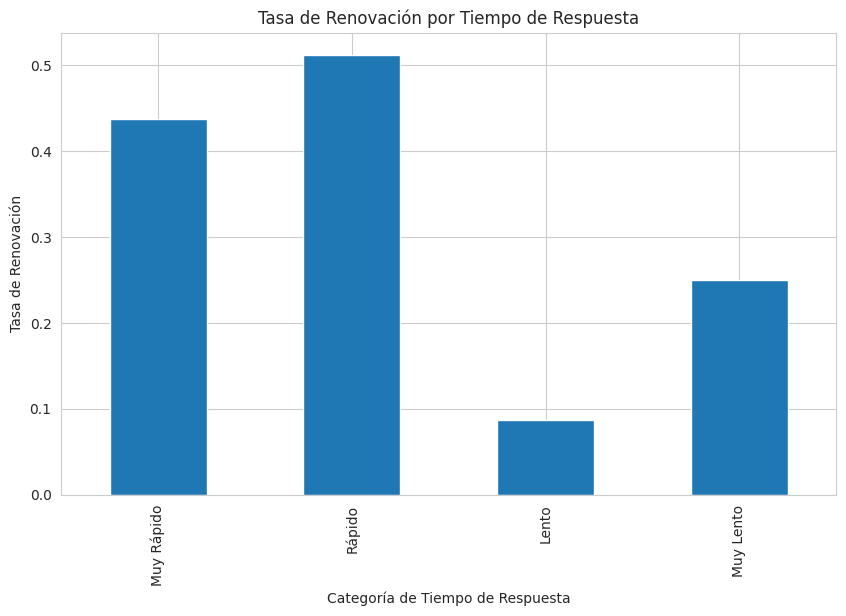

Tasa de renovación por tiempo de respuesta:


response_category
Muy Rápido    0.437500
Rápido        0.512195
Lento         0.086957
Muy Lento     0.250000
Name: renewed_contract, dtype: float64

In [38]:
# 3. Tiempo de respuesta vs Renovación
# Crear categorías de tiempo de respuesta
clients['response_category'] = pd.cut(clients['avg_response_time_hours'], 
                                     bins=[0, 20, 30, 40, 100], 
                                     labels=['Muy Rápido', 'Rápido', 'Lento', 'Muy Lento'])

renewal_by_response = clients.groupby('response_category')['renewed_contract'].mean()
renewal_by_response.plot(kind='bar')
plt.title('Tasa de Renovación por Tiempo de Respuesta')
plt.ylabel('Tasa de Renovación')
plt.xlabel('Categoría de Tiempo de Respuesta')
plt.show()

print("Tasa de renovación por tiempo de respuesta:")
renewal_by_response

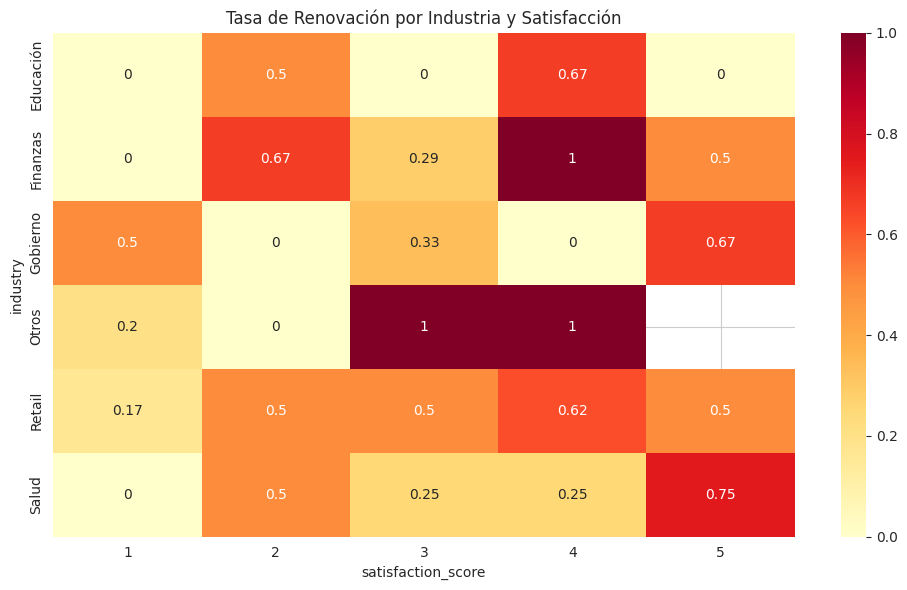

Tabla pivote:


satisfaction_score,1,2,3,4,5
industry,,,,,
Educación,0.000000,0.500000,0.000000,0.666667,0.000000
Finanzas,0.000000,0.666667,0.285714,1.000000,0.500000
Gobierno,0.500000,0.000000,0.333333,0.000000,0.666667
Otros,0.200000,0.000000,1.000000,1.000000,NaN
Retail,0.166667,0.500000,0.500000,0.625000,0.500000
Salud,0.000000,0.500000,0.250000,0.250000,0.750000


In [39]:
# 4. Análisis multivariado: Industria + Satisfacción
pivot_table = pd.pivot_table(clients, 
                            values='renewed_contract', 
                            index='industry', 
                            columns='satisfaction_score', 
                            aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', center=0.5)
plt.title('Tasa de Renovación por Industria y Satisfacción')
plt.tight_layout()
plt.show()

print("Tabla pivote:")
pivot_table

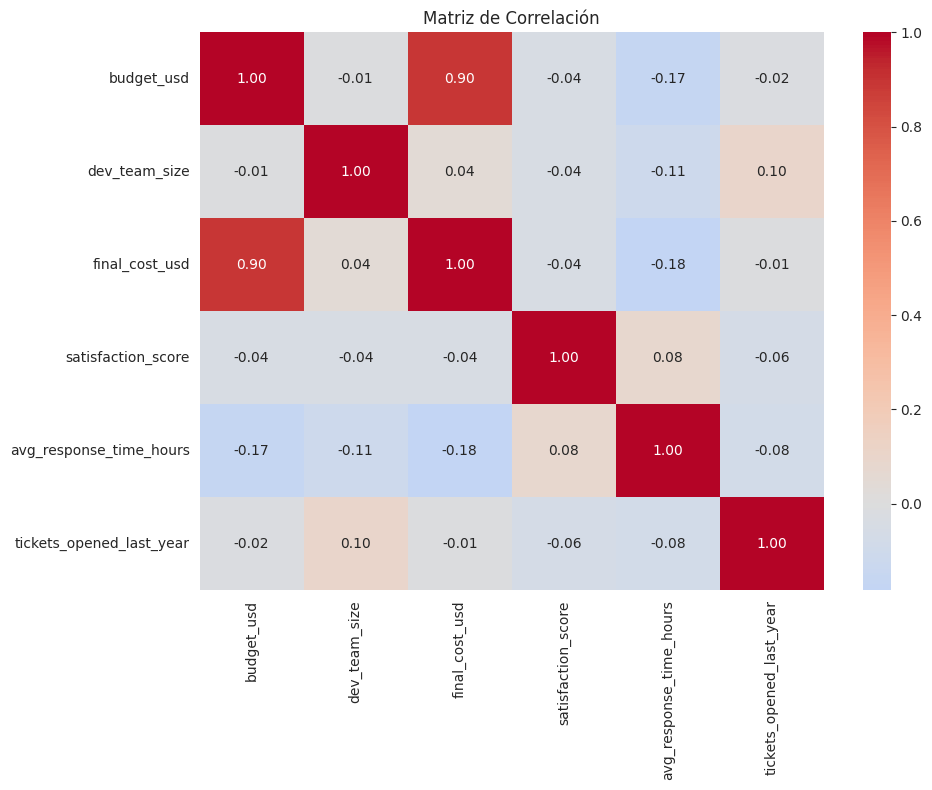

In [40]:
# 5. Correlaciones numéricas
numeric_cols = ['budget_usd', 'dev_team_size', 'final_cost_usd', 
                'satisfaction_score', 'avg_response_time_hours', 'tickets_opened_last_year']

corr_matrix = df_merged[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()
